<h2 style='color:blue' align='center'>Data Augmentation To Address Overfitting In Flower Classification CNN</h2>

**In this notebook we will build a CNN to classify flower images. We will also see how our model overfits and how overfitting can be addressed using data augmentation. Data augmentation is a process of generating new training samples from current training dataset using transformations such as zoom, rotations, change in contrast etc**

Credits: I used tensorflow offical tutorial: https://www.tensorflow.org/tutorials/images/classification as a reference and made bunch of changes to make it simpler

In below image, 4 new training samples are generated from original sample using different transformations

<img src="daisy2.JPG" />

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

We will download flowers dataset from google website and store it locally. In below call it downloads the zip file (.tgz) in cache_dir which is . meaning the current folder

<h3 style='color:purple'>Load flowers dataset</h3>

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 1412s 6us/step


In [23]:
data_dir

WindowsPath('datasets/flower_photos')

In [24]:
data_dir = 'datasets/flower_photos/flower_photos'

In [25]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos/flower_photos')

In [26]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [27]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [28]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

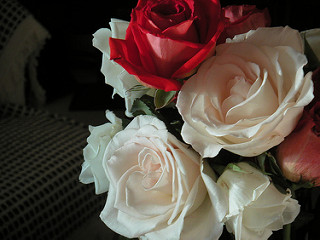

In [29]:
PIL.Image.open(str(roses[1]))

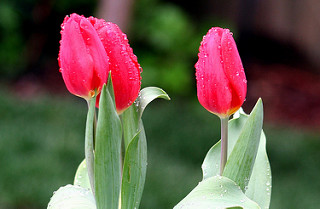

In [30]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

<h3 style='color:purple'>Read flowers images from disk into numpy array using opencv</h3>

In [31]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [32]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [33]:
flowers_images_dict['roses'][:5]

[WindowsPath('datasets/flower_photos/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [34]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [35]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [36]:
img.shape

(240, 179, 3)

In [37]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [41]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        if img is not None:
            resized_img = cv2.resize(img,(180,180))
            X.append(resized_img)
            y.append(flowers_labels_dict[flower_name])

In [42]:
X = np.array(X)
y = np.array(y)

<h3 style='color:purple'>Train test split</h3>

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

<h3 style='color:purple'>Preprocessing: scale images</h3>

In [44]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

<h3 style='color:purple'>Build convolutional neural network and train it</h3>

In [45]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=10)              

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 168ms/step - accuracy: 0.3666 - loss: 1.4869
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 178ms/step - accuracy: 0.5865 - loss: 1.0373
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 177ms/step - accuracy: 0.7094 - loss: 0.7733
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 176ms/step - accuracy: 0.7879 - loss: 0.5810
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 190ms/step - accuracy: 0.8761 - loss: 0.3634
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 181ms/step - accuracy: 0.9243 - loss: 0.2346
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 188ms/step - accuracy: 0.9783 - loss: 0.0932
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 177ms/step - accuracy: 0.9795 - loss: 0.0830
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 203ms/step - accuracy: 0.9782 - loss: 0.0730
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 185ms/step - accuracy: 0.9933 - loss: 0.0254


In [46]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.6095 - loss: 2.2730


[2.137113332748413, 0.6307189464569092]

**Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (66.99%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting**

In [47]:
predictions = model.predict(X_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


array([[  3.6702354 ,  27.959347  ,   4.415602  , -12.781611  ,
         -4.4845586 ],
       [  8.190405  ,  -1.4260907 ,  -4.243983  ,  -1.9506639 ,
          2.310112  ],
       [  6.7643394 ,   8.311964  ,  10.628027  ,  -6.022948  ,
          0.6969384 ],
       ...,
       [  4.8952785 ,  -6.4548693 ,  -2.8885944 ,   9.920912  ,
          6.930882  ],
       [  0.77531713,   7.9314017 ,  -1.4456432 ,   4.2461724 ,
          0.5849886 ],
       [  3.2812982 , -10.876086  ,   1.6762495 ,   9.841281  ,
          4.6376343 ]], dtype=float32)

In [48]:
score = tf.nn.softmax(predictions[0])

In [49]:
np.argmax(score)

1

In [50]:
y_test[0]

1

<h3 style='color:purple'>Improve Test Accuracy Using Data Augmentation</h3>

In [55]:
img_height = 180  
img_width = 180  
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

D:\Anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**Original Image**

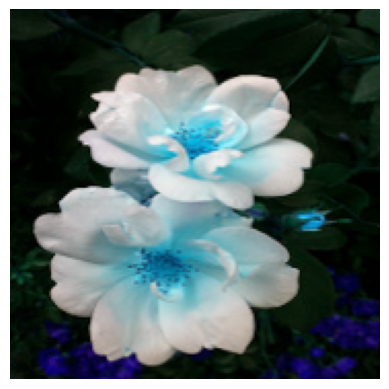

In [56]:
plt.axis('off')
plt.imshow(X[0])

**Newly generated training sample using data augmentation**

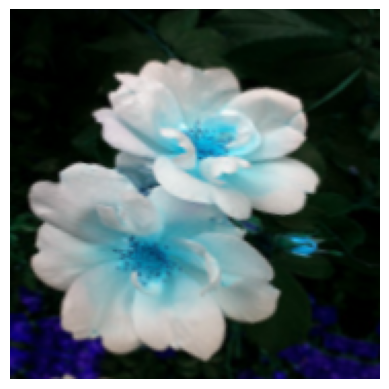

In [58]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

<h3 style='color:purple'>Train the model using data augmentation and a drop out layer</h3>

In [59]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=10)    

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 22s 220ms/step - accuracy: 0.3138 - loss: 1.4994
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 19s 220ms/step - accuracy: 0.5676 - loss: 1.0694
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 24s 276ms/step - accuracy: 0.6359 - loss: 0.9390
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 27s 313ms/step - accuracy: 0.6577 - loss: 0.8856
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 24s 283ms/step - accuracy: 0.6716 - loss: 0.8447
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 238ms/step - accuracy: 0.6814 - loss: 0.7883
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 19s 220ms/step - accuracy: 0.7204 - loss: 0.7355
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 22s 253ms/step - accuracy: 0.7297 - loss: 0.7053
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 237ms/step - accuracy: 0.7474 - loss: 0.6646
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 235ms/step - accuracy: 0.7291 - loss: 0.6625


In [60]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7052 - loss: 0.8041


[0.858573317527771, 0.7069717049598694]

**You can see that by using data augmentation and drop out layer the accuracy of test set predictions is increased to 73.74%**